In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: No module named 'arch'

In [ ]:
data = pd.read_csv("data.csv")
data.head()

,Unnamed: 0,No,Date/Time,Date/time end,Altitude [m],Size fraction,Mass v [µg/m**3],Na+ [µg/m**3],[NH4]+ [µg/m**3],K+ [µg/m**3],...,Cu [ng/m**3],Zn [ng/m**3],Pb [ng/m**3],As [ng/m**3],Se [ng/m**3],Sr [ng/m**3],Rb [ng/m**3],Ba [ng/m**3],La [ng/m**3],Ce [ng/m**3]
0,0,866,2010-01-11 16:30:00,2010-01-12 17:16:00,42,0.05 - 0.14 µm,0.063,0.0026,0.0061,<0.0006,...,0.17,0.21,<0.0228,0.003,<0.001,<0.0372,<0.0048,<0.0048,0.006,<0.006
1,1,867,2010-01-11 16:30:00,2010-01-12 17:16:00,42,0.14 - 0.42 µm,0.636,0.0661,0.0119,<0.0006,...,0.16,0.09,0.026,0.025,0.002,0.051,0.011,<0.0048,0.057,<0.006
2,2,868,2010-01-11 16:30:00,2010-01-12 17:16:00,42,0.42 - 1.2 µm,5.886,0.6887,0.0016,0.02,...,0.16,0.24,0.052,0.02,0.041,0.831,0.064,1.016,0.682,0.068
3,3,869,2010-01-11 16:30:00,2010-01-12 17:16:00,42,1.2 - 3.5 µm,28.971,6.7001,0.0021,0.2373,...,0.34,0.43,0.055,0.168,0.096,3.35,0.331,4.086,2.026,0.318
4,4,870,2010-01-11 16:30:00,2010-01-12 17:16:00,42,3.5 - 10 µm,31.786,6.8745,0.0109,0.3071,...,0.25,0.41,0.063,0.079,0.004,4.179,0.425,1.977,1.578,0.562


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          629 non-null    int64  
 1   No                  629 non-null    int64  
 2   Date/Time           629 non-null    object 
 3   Date/time end       629 non-null    object 
 4   Altitude [m]        629 non-null    int64  
 5   Size fraction       629 non-null    object 
 6   Mass v [µg/m**3]    629 non-null    float64
 7   Na+ [µg/m**3]       629 non-null    object 
 8   [NH4]+ [µg/m**3]    629 non-null    object 
 9   K+ [µg/m**3]        629 non-null    object 
 10  Mg2+ [µg/m**3]      629 non-null    object 
 11  Ca2+ [µg/m**3]      629 non-null    object 
 12  Cl- [µg/m**3]       629 non-null    float64
 13  [NO3]- [µg/m**3]    629 non-null    object 
 14  [SO4]2- [µg/m**3]   629 non-null    float64
 15  [C2O4]2- [µg/m**3]  629 non-null    object 
 16  Br- [µg/

In [ ]:
# Assuming 'final_data' is your DataFrame
def calculate_percentage(col):
    col_str = col.astype(str).str.strip()  # Convert to string and remove leading/trailing whitespace
    count = col_str.str.startswith("<").sum()  # Count values starting with "<"
    total = col.notna().sum()  # Total non-missing values in the column
    return (count / total) * 100 if total > 0 else 0  # Calculate percentage, handle division by zero

# Select columns from the 6th column (index 5) onward
cols = data.iloc[:, 7:]

# Apply the function to each column
percentages = cols.apply(calculate_percentage)

# Create a DataFrame for presentation
result = percentages.reset_index()
result.columns = ['Column', 'Percentage']

# Print the results with two decimal places
for idx, row in result.iterrows():
    print(f"{row['Column']}: {row['Percentage']:.2f}%")

Na+ [µg/m**3]: 5.41%
[NH4]+ [µg/m**3]: 11.92%
K+ [µg/m**3]: 24.17%
Mg2+ [µg/m**3]: 2.07%
Ca2+ [µg/m**3]: 4.77%
Cl- [µg/m**3]: 0.00%
[NO3]- [µg/m**3]: 0.48%
[SO4]2- [µg/m**3]: 0.00%
[C2O4]2- [µg/m**3]: 13.83%
Br- [µg/m**3]: 44.36%
C org [µg/m**3]: 2.54%
EC [µg/m**3]: 26.07%
TC [µg/m**3]: 0.00%
Ca [ng/m**3]: 0.00%
Ti [ng/m**3]: 1.59%
V [ng/m**3]: 3.02%
Cr [ng/m**3]: 7.95%
Mn [ng/m**3]: 19.55%
Fe [ng/m**3]: 0.48%
Ni [ng/m**3]: 16.38%
Cu [ng/m**3]: 25.28%
Zn [ng/m**3]: 0.00%
Pb [ng/m**3]: 4.93%
As [ng/m**3]: 23.85%
Se [ng/m**3]: 20.03%
Sr [ng/m**3]: 1.75%
Rb [ng/m**3]: 24.64%
Ba [ng/m**3]: 20.19%
La [ng/m**3]: 47.54%
Ce [ng/m**3]: 28.30%


Exporatory analysis on original data


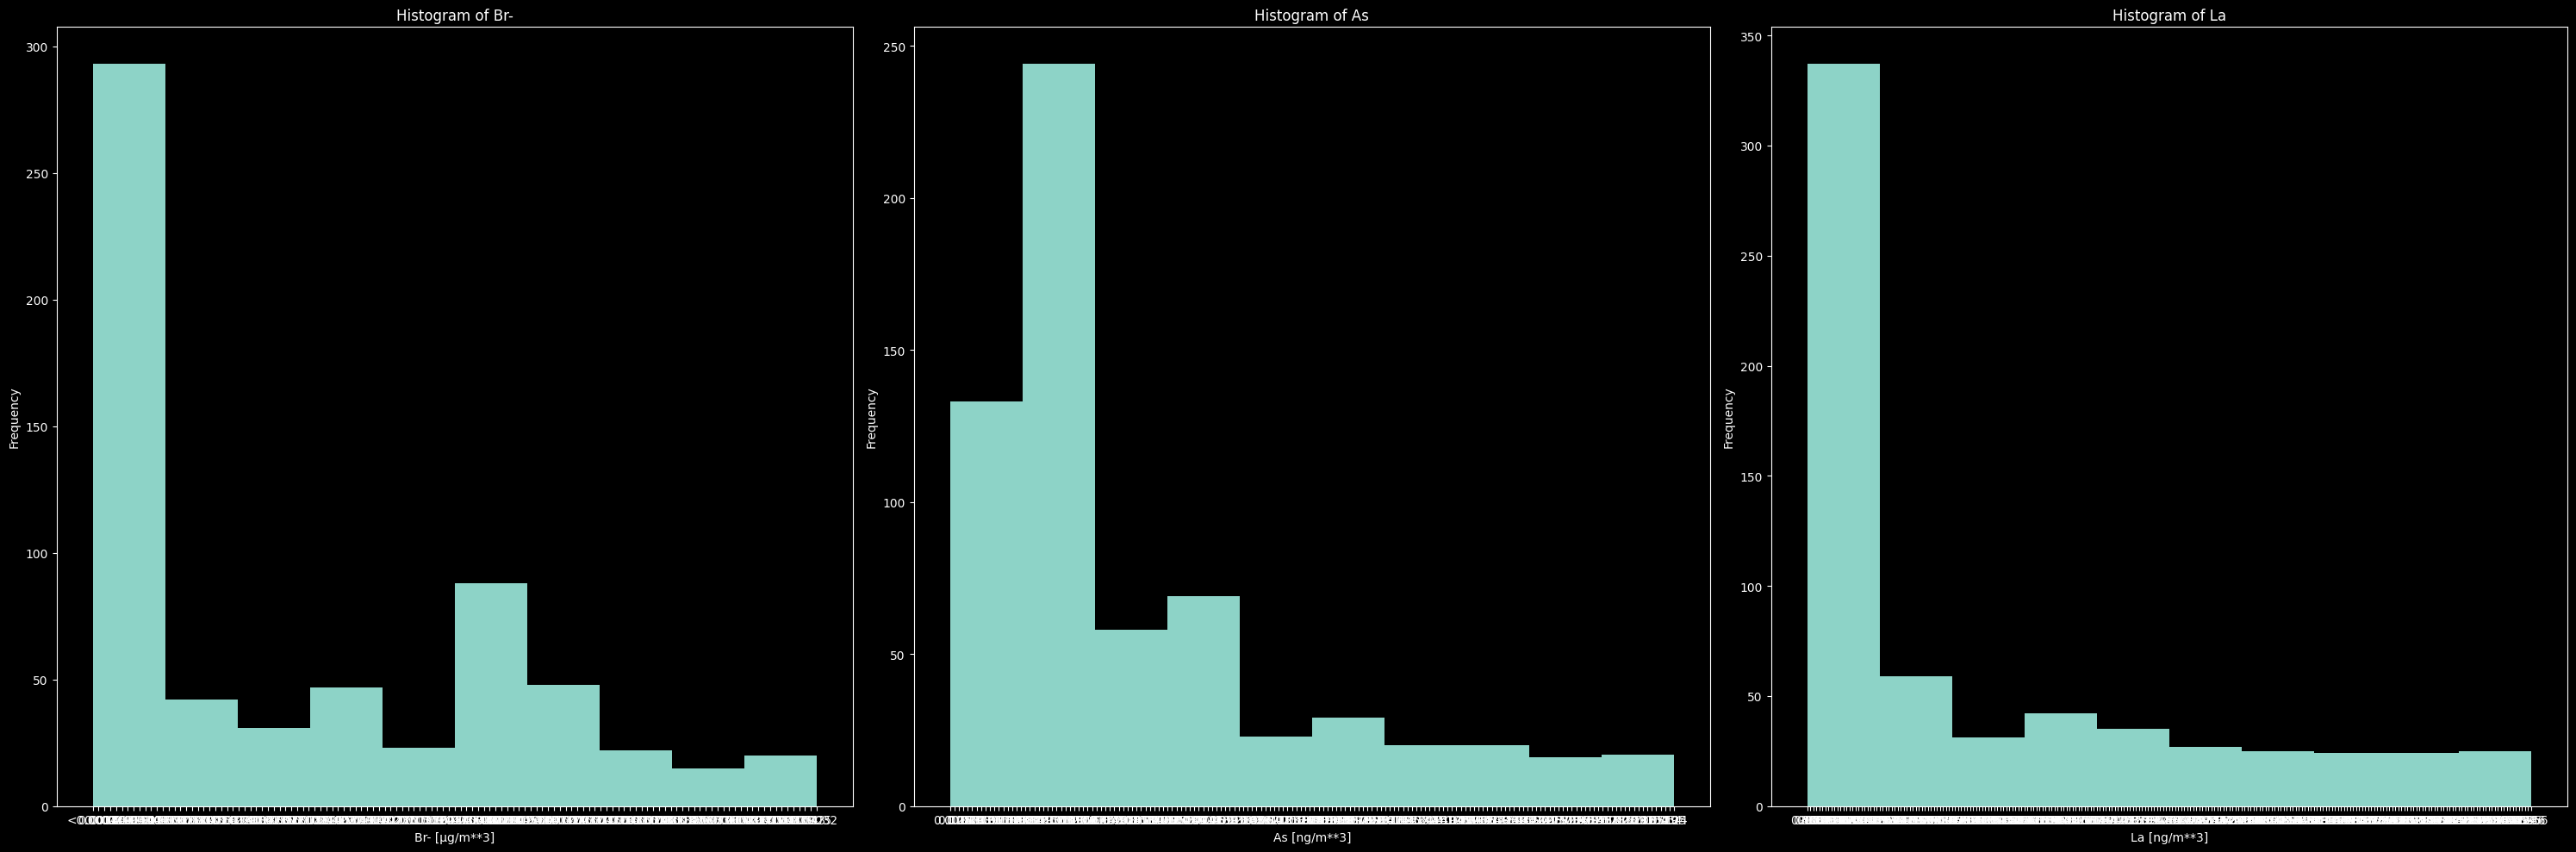

In [ ]:
columns = ["Br- [µg/m**3]", "As [ng/m**3]", "La [ng/m**3]"]

# Create figure with 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Plot histograms
for i, col in enumerate(columns):
    ax = axes[i]
    ax.hist(data[col], bins=10)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    element = col.split(' [')[0]
    ax.set_title(f"Histogram of {element}")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Make a copy to preserve original
new_data = data.copy()

# Select all columns from position 6 onward
cols_to_clean = new_data.columns[6:]

# Loop through each column and clean/convert values
def clean_to_float(series):
    # 1. Convert everything to string
    s = series.astype(str)
    # 2. Remove leading '<' and surrounding whitespace
    s = s.str.lstrip('<').str.strip()
    # 3. Parse numeric, coercing invalid entries to NaN
    return pd.to_numeric(s, errors='coerce')

for col in cols_to_clean:
    new_data[col] = clean_to_float(new_data[col])

# Verify the conversion
dtypes = new_data[cols_to_clean].dtypes
print(new_data.info())  # Should all be float64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          629 non-null    int64  
 1   No                  629 non-null    int64  
 2   Date/Time           629 non-null    object 
 3   Date/time end       629 non-null    object 
 4   Altitude [m]        629 non-null    int64  
 5   Size fraction       629 non-null    object 
 6   Mass v [µg/m**3]    629 non-null    float64
 7   Na+ [µg/m**3]       629 non-null    float64
 8   [NH4]+ [µg/m**3]    629 non-null    float64
 9   K+ [µg/m**3]        629 non-null    float64
 10  Mg2+ [µg/m**3]      629 non-null    float64
 11  Ca2+ [µg/m**3]      629 non-null    float64
 12  Cl- [µg/m**3]       629 non-null    float64
 13  [NO3]- [µg/m**3]    629 non-null    float64
 14  [SO4]2- [µg/m**3]   629 non-null    float64
 15  [C2O4]2- [µg/m**3]  629 non-null    float64
 16  Br- [µg/

In [ ]:
import pandas as pd

# Make a copy to preserve original
new_data = data.copy()

# Select all columns from position 6 onward
cols_to_clean = new_data.columns[6:]

# Function to clean and convert a series to float
def clean_to_float(series):
    # 1. Convert everything to string
    s = series.astype(str)
    # 2. Remove leading '<' and surrounding whitespace
    s = s.str.lstrip('<').str.strip()
    # 3. Parse numeric, coercing invalid entries to NaN
    return pd.to_numeric(s, errors='coerce')

# Apply cleaning function to each target column
for col in cols_to_clean:
    new_data[col] = clean_to_float(new_data[col])

# Verify the conversion
dtypes = new_data[cols_to_clean].dtypes
print("Dtypes after cleaning:\n", dtypes)  # Should all be float64


Dtypes after cleaning:
 Mass v [µg/m**3]      float64
Na+ [µg/m**3]         float64
[NH4]+ [µg/m**3]      float64
K+ [µg/m**3]          float64
Mg2+ [µg/m**3]        float64
Ca2+ [µg/m**3]        float64
Cl- [µg/m**3]         float64
[NO3]- [µg/m**3]      float64
[SO4]2- [µg/m**3]     float64
[C2O4]2- [µg/m**3]    float64
Br- [µg/m**3]         float64
C org [µg/m**3]       float64
EC [µg/m**3]          float64
TC [µg/m**3]          float64
Ca [ng/m**3]          float64
Ti [ng/m**3]          float64
V [ng/m**3]           float64
Cr [ng/m**3]          float64
Mn [ng/m**3]          float64
Fe [ng/m**3]          float64
Ni [ng/m**3]          float64
Cu [ng/m**3]          float64
Zn [ng/m**3]          float64
Pb [ng/m**3]          float64
As [ng/m**3]          float64
Se [ng/m**3]          float64
Sr [ng/m**3]          float64
Rb [ng/m**3]          float64
Ba [ng/m**3]          float64
La [ng/m**3]          float64
Ce [ng/m**3]          float64
dtype: object


In [ ]:
means = new_data.mean(numeric_only=True).round(3)
stds  = new_data.std(numeric_only=True).round(3)

# Combine into a single DataFrame
summary_df = pd.concat([means, stds], axis=1)      \
               .reset_index()                      \
               .rename(columns={
                   'index': 'Column',
                   0: 'Mean',
                   1: 'Std'
               })

print(summary_df)

                Column      Mean       Std
0           Unnamed: 0   329.623   191.473
1                   No  1219.502   202.193
2         Altitude [m]    42.000     0.000
3     Mass v [µg/m**3]    17.358    42.219
4        Na+ [µg/m**3]     1.118     1.903
5     [NH4]+ [µg/m**3]     0.022     0.036
6         K+ [µg/m**3]     0.055     0.085
7       Mg2+ [µg/m**3]     0.141     0.266
8       Ca2+ [µg/m**3]     0.283     0.404
9        Cl- [µg/m**3]     1.938     3.404
10    [NO3]- [µg/m**3]     0.192     0.270
11   [SO4]2- [µg/m**3]     0.590     0.736
12  [C2O4]2- [µg/m**3]     0.010     0.017
13       Br- [µg/m**3]     0.004     0.016
14     C org [µg/m**3]     0.259     0.391
15        EC [µg/m**3]     0.050     0.111
16        TC [µg/m**3]     0.307     0.481
17        Ca [ng/m**3]   329.064  1071.071
18        Ti [ng/m**3]    28.284   114.421
19         V [ng/m**3]     0.827     2.708
20        Cr [ng/m**3]     0.899     2.729
21        Mn [ng/m**3]     5.791    21.511
22        F

Using the substitution method 

In [ ]:
imputed = data.copy()

#identifying values starting with <
cols = imputed.iloc[:, 7:].columns  

# Process each measurement column
for col in cols:
    imputed[col] = data[col].astype(str).apply(
        lambda x: float(x.strip().lstrip("<")) / 2 if x.strip().startswith("<") else float(x)
    )

imputed.to_csv("imputed.csv")

In [ ]:
#checking the description of the dataset
imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          629 non-null    int64  
 1   No                  629 non-null    int64  
 2   Date/Time           629 non-null    object 
 3   Date/time end       629 non-null    object 
 4   Altitude [m]        629 non-null    int64  
 5   Size fraction       629 non-null    object 
 6   Mass v [µg/m**3]    629 non-null    float64
 7   Na+ [µg/m**3]       629 non-null    float64
 8   [NH4]+ [µg/m**3]    629 non-null    float64
 9   K+ [µg/m**3]        629 non-null    float64
 10  Mg2+ [µg/m**3]      629 non-null    float64
 11  Ca2+ [µg/m**3]      629 non-null    float64
 12  Cl- [µg/m**3]       629 non-null    float64
 13  [NO3]- [µg/m**3]    629 non-null    float64
 14  [SO4]2- [µg/m**3]   629 non-null    float64
 15  [C2O4]2- [µg/m**3]  629 non-null    float64
 16  Br- [µg/

In [ ]:
#mean, standard deviation and frequency distribution
means = imputed.mean(numeric_only=True).round(3)
stds  = imputed.std(numeric_only=True).round(3)

# Combine into a single DataFrame
summary_df = pd.concat([means, stds], axis=1)      \
               .reset_index()                      \
               .rename(columns={
                   'index': 'Column',
                   0: 'Mean',
                   1: 'Std'
               })

print(summary_df)

                Column      Mean       Std
0           Unnamed: 0   329.623   191.473
1                   No  1219.502   202.193
2         Altitude [m]    42.000     0.000
3     Mass v [µg/m**3]    17.358    42.219
4        Na+ [µg/m**3]     1.118     1.903
5     [NH4]+ [µg/m**3]     0.022     0.036
6         K+ [µg/m**3]     0.055     0.085
7       Mg2+ [µg/m**3]     0.141     0.266
8       Ca2+ [µg/m**3]     0.282     0.404
9        Cl- [µg/m**3]     1.938     3.404
10    [NO3]- [µg/m**3]     0.192     0.270
11   [SO4]2- [µg/m**3]     0.590     0.736
12  [C2O4]2- [µg/m**3]     0.010     0.017
13       Br- [µg/m**3]     0.004     0.016
14     C org [µg/m**3]     0.259     0.391
15        EC [µg/m**3]     0.049     0.112
16        TC [µg/m**3]     0.307     0.481
17        Ca [ng/m**3]   329.064  1071.071
18        Ti [ng/m**3]    28.284   114.421
19         V [ng/m**3]     0.827     2.708
20        Cr [ng/m**3]     0.898     2.730
21        Mn [ng/m**3]     5.790    21.511
22        F

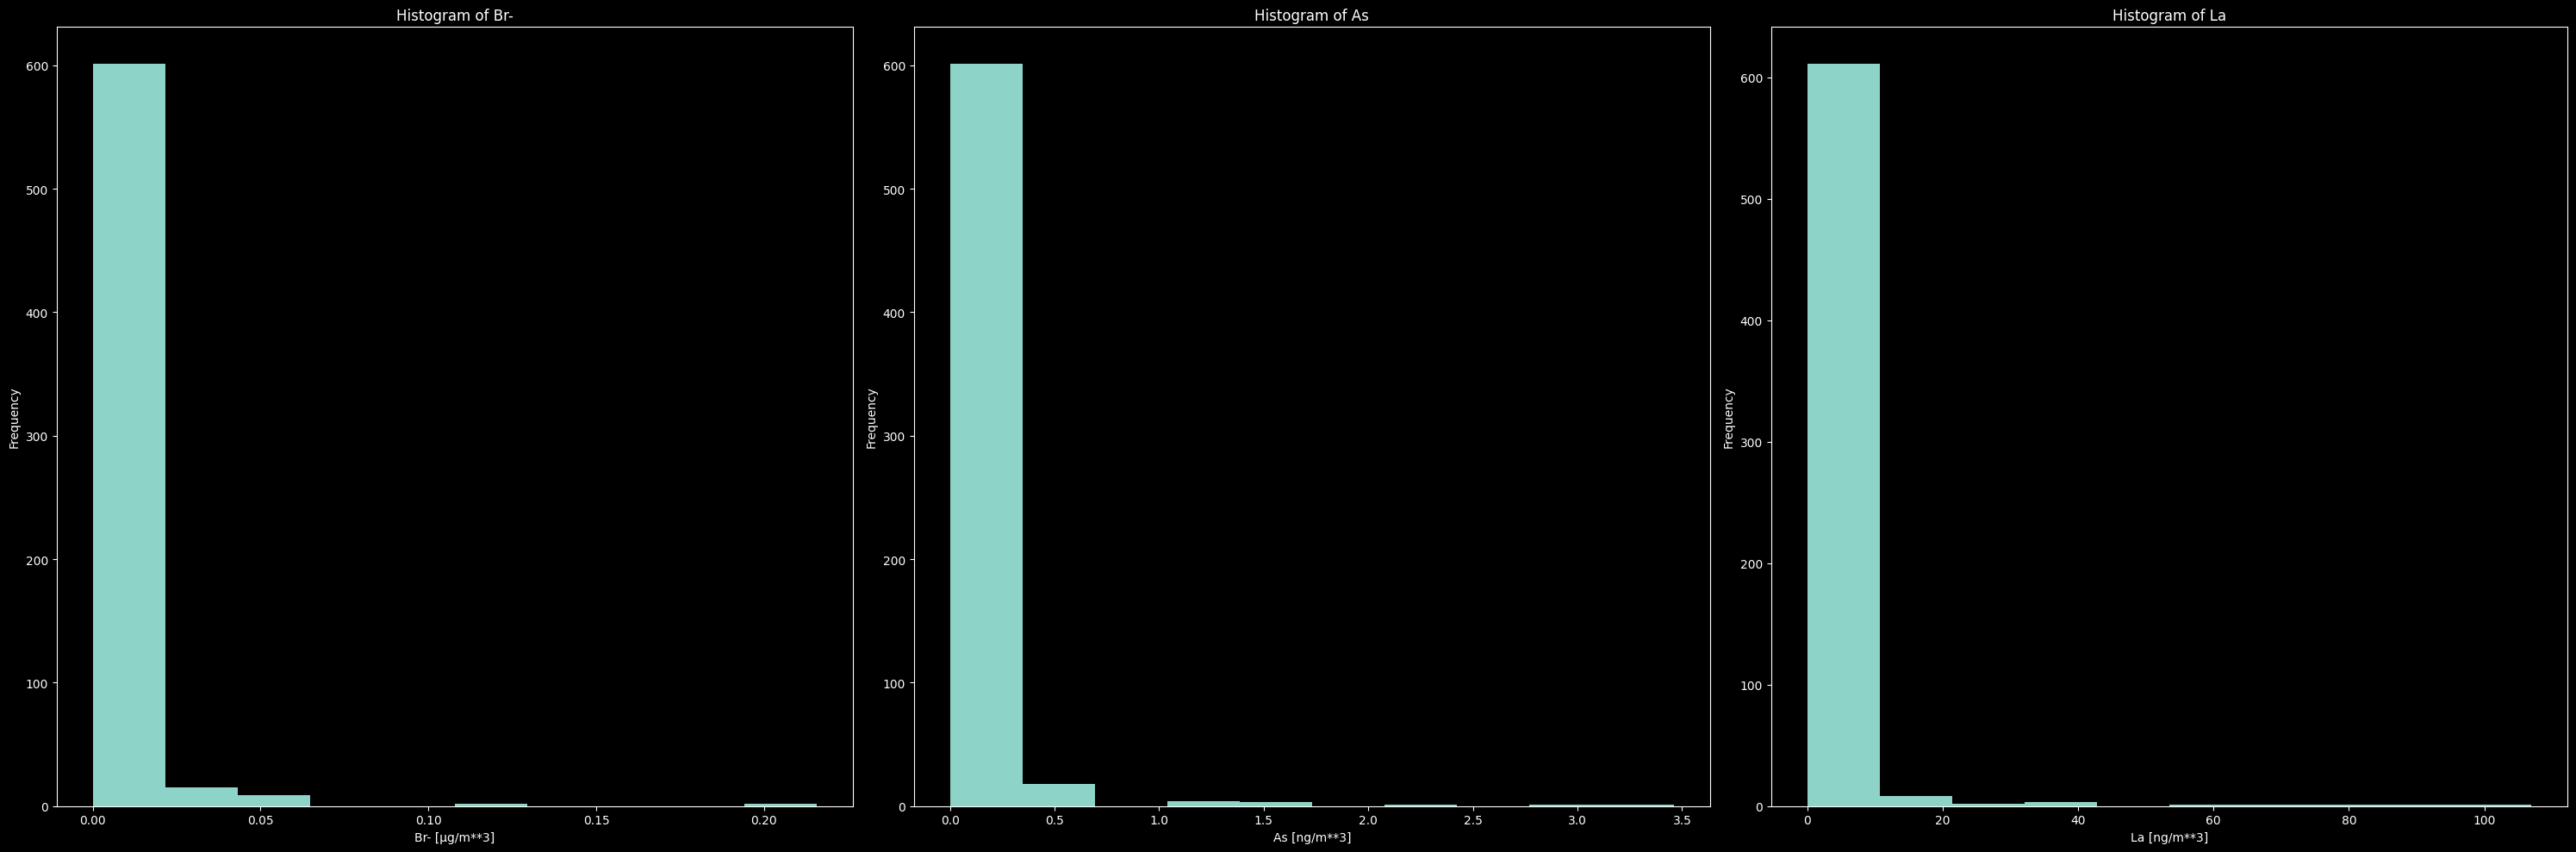

In [ ]:


columns = ["Br- [µg/m**3]", "As [ng/m**3]", "La [ng/m**3]"]

# Create figure with 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Plot histograms
for i, col in enumerate(columns):
    ax = axes[i]
    ax.hist(imputed[col], bins=10)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    element = col.split(' [')[0]
    ax.set_title(f"Histogram of {element}")

plt.tight_layout()
plt.show()

Synthetic Data Generation using deepecho

In [ ]:
from sdv.metadata import SingleTableMetadata
from sdv.sequential import PARSynthesizer

real_data = pd.read_csv('imputed.csv', parse_dates=['Date/Time',"Date/time end"])



metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)
metadata.update_column(column_name='Unnamed: 0', sdtype='id')
metadata.set_sequence_key('Unnamed: 0')
metadata.set_sequence_index(['Date/Time',"Date/time end"])

In [ ]:
synthesizer = PARSynthesizer(metadata)
synthesizer.fit(real_data)
synthetic_data = synthesizer.sample(num_sequences=1000)
synthetic_data.to_csv('synthetic_data.csv', index=False)

Comparing datasets

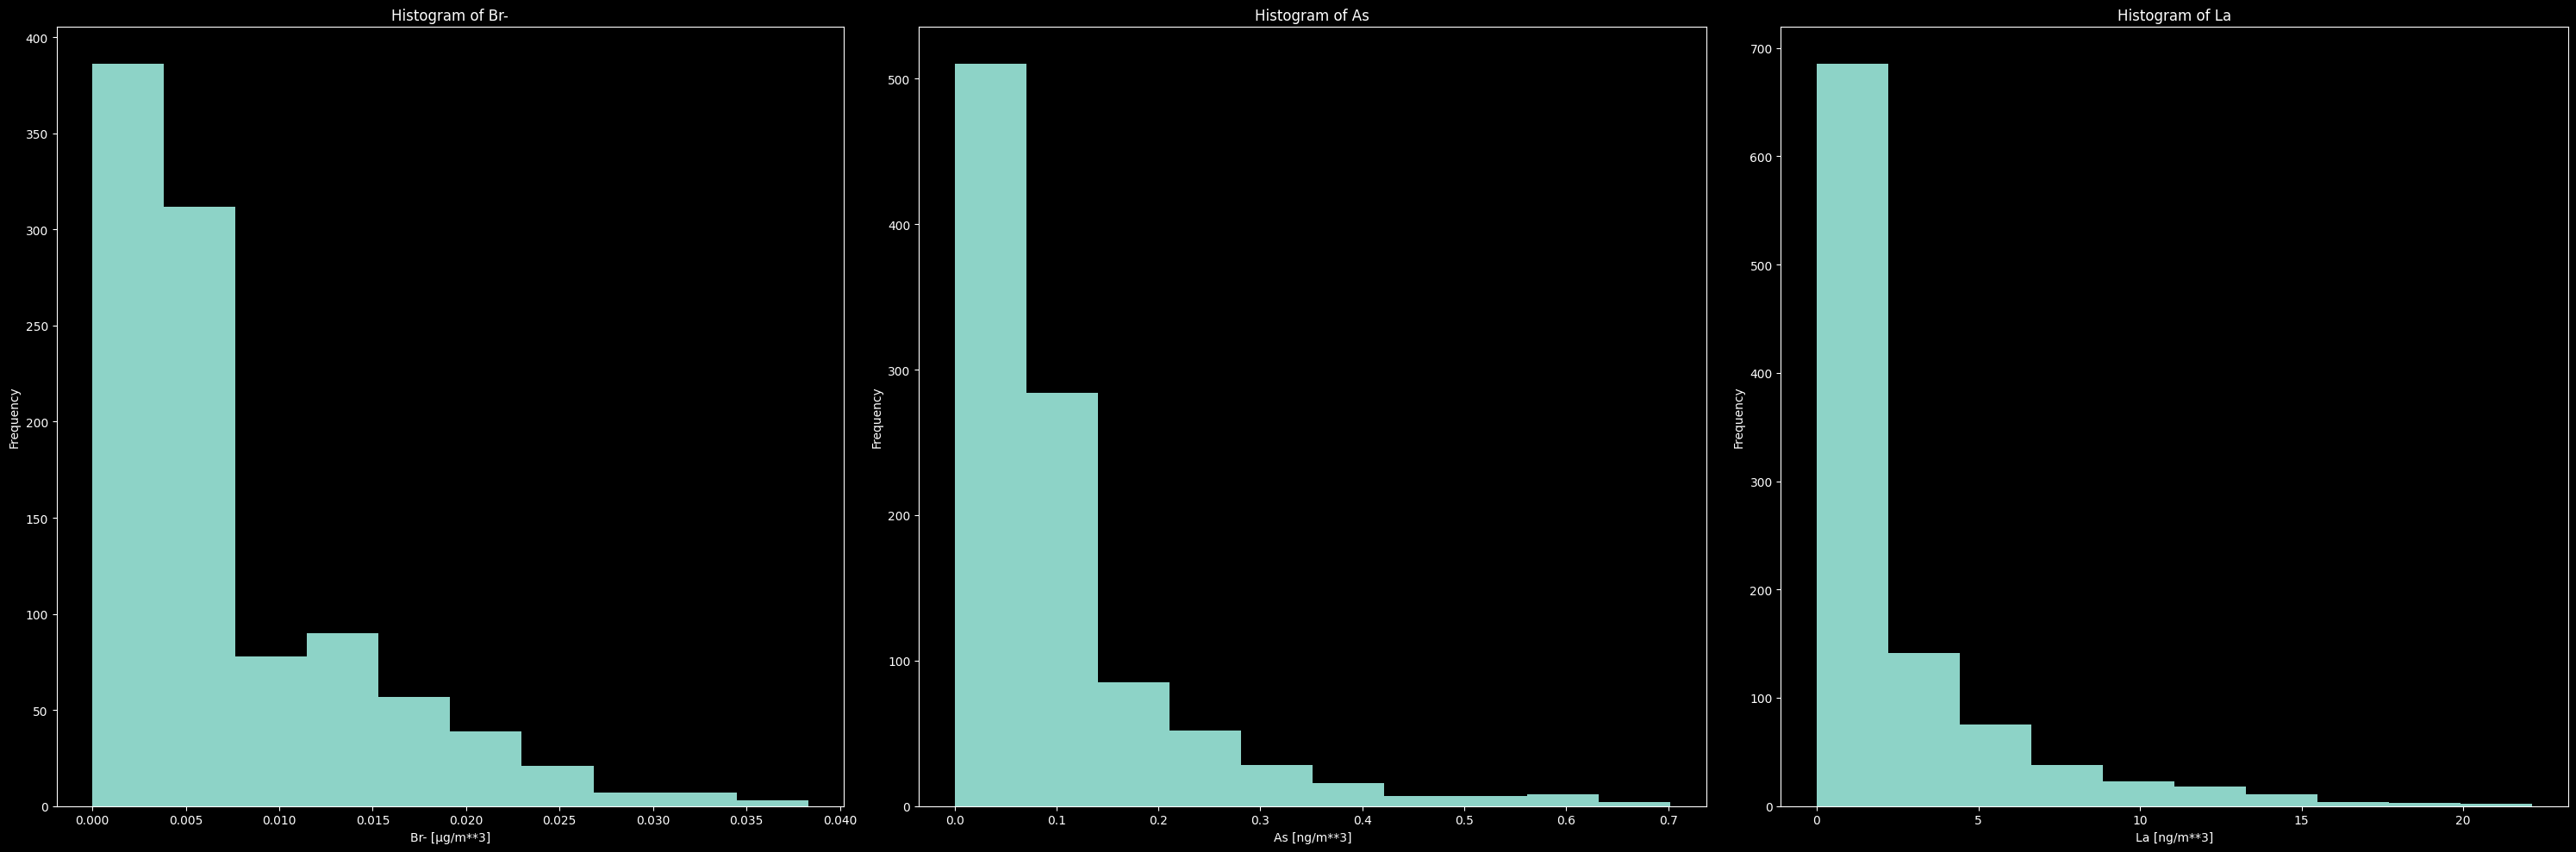

In [6]:
synthetic_data = pd.read_csv("synthetic_data.csv")

columns = ["Br- [µg/m**3]", "As [ng/m**3]", "La [ng/m**3]"]
# Plotting a histograms
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

for i, col in enumerate(columns):
    ax = axes[i]
    ax.hist(synthetic_data[col], bins=10)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    element = col.split(' [')[0]
    ax.set_title(f"Histogram of {element}")

plt.tight_layout()
plt.show()

In [7]:
synthetic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        1000 non-null   int64  
 1   Unnamed: 0          1000 non-null   int64  
 2   No                  1000 non-null   int64  
 3   Date/Time           1000 non-null   object 
 4   Date/time end       1000 non-null   object 
 5   Altitude [m]        1000 non-null   int64  
 6   Size fraction       1000 non-null   object 
 7   Mass v [µg/m**3]    1000 non-null   float64
 8   Na+ [µg/m**3]       1000 non-null   float64
 9   [NH4]+ [µg/m**3]    1000 non-null   float64
 10  K+ [µg/m**3]        1000 non-null   float64
 11  Mg2+ [µg/m**3]      1000 non-null   float64
 12  Ca2+ [µg/m**3]      1000 non-null   float64
 13  Cl- [µg/m**3]       1000 non-null   float64
 14  [NO3]- [µg/m**3]    1000 non-null   float64
 15  [SO4]2- [µg/m**3]   1000 non-null   float64
 16  [C2O4]2

In [8]:
means = synthetic_data.mean(numeric_only=True).round(3)
stds  = synthetic_data.std(numeric_only=True).round(3)

# Combine into a single DataFrame
summary_df = pd.concat([means, stds], axis=1)      \
               .reset_index()                      \
               .rename(columns={
                   'index': 'Column',
                   0: 'Mean',
                   1: 'Std'
               })

print(summary_df)

                Column         Mean          Std
0         Unnamed: 0.1  8689589.541  4868172.325
1           Unnamed: 0  8483152.663  4842954.527
2                   No     1192.038      125.813
3         Altitude [m]       42.000        0.000
4     Mass v [µg/m**3]       24.126       21.859
5        Na+ [µg/m**3]        1.278        1.068
6     [NH4]+ [µg/m**3]        0.022        0.017
7         K+ [µg/m**3]        0.059        0.047
8       Mg2+ [µg/m**3]        0.168        0.137
9       Ca2+ [µg/m**3]        0.312        0.232
10       Cl- [µg/m**3]        2.260        1.819
11    [NO3]- [µg/m**3]        0.199        0.148
12   [SO4]2- [µg/m**3]        0.619        0.460
13  [C2O4]2- [µg/m**3]        0.010        0.009
14       Br- [µg/m**3]        0.007        0.007
15     C org [µg/m**3]        0.237        0.200
16        EC [µg/m**3]        0.047        0.050
17        TC [µg/m**3]        0.298        0.244
18        Ca [ng/m**3]      414.357      405.219
19        Ti [ng/m**

Stationary Test(ADF and PP test)